Loan Status Summary:
loan_status
Fully Paid                                             27037
Current                                                19268
Charged Off                                             5571
Does not meet the credit policy. Status:Fully Paid       984
Late (31-120 days)                                       580
Does not meet the credit policy. Status:Charged Off      368
In Grace Period                                          265
Late (16-30 days)                                        106
Default                                                   52
Name: count, dtype: int64


/var/folders/qd/n_spt9vn51v0dmq660hf1qmm0000gn/T/ipykernel_49518/2483420308.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_loans['6_months_expected'] = active_loans['instalment'] * 6


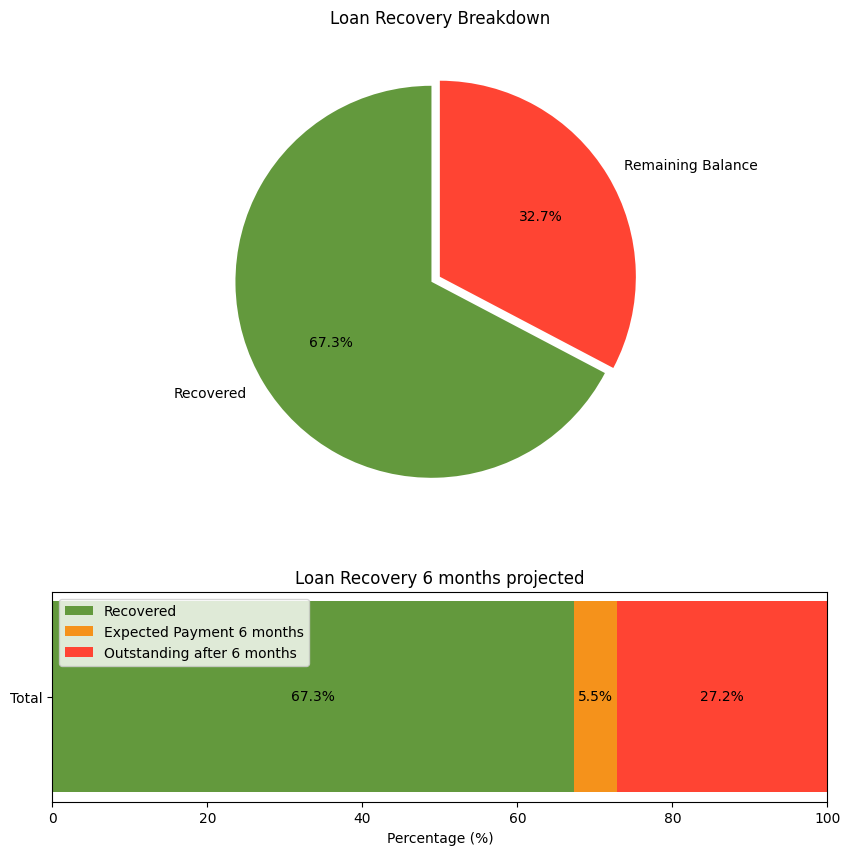

Total Expected: £973,478,653.32
Total Recovered: £655,067,555.06
Remaining Balance: £318,411,098.26
Projected 6-Month Payments: £53,674,587.12


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec


df = pd.read_csv('financial_loan_data.csv')

# checking if loan is still active
loan_status_summary = df['loan_status'].value_counts()

print("Loan Status Summary:")
print(loan_status_summary)

# selecting loans that are still active
active_statuses = [
    'Current',
    'Late (16-30 days)',
    'Late (31-120 days)',
    'In Grace Period'
]

active_loans = df[df['loan_status'].isin(active_statuses)]


# calculating total expected repayment
df['total_expected'] = df['instalment'] * df['term_months']

# calculating total recovered
df['total_recovered'] = df['total_payment']

# calculating projected payments in the next 6 months (active loans only)
active_loans['6_months_expected'] = active_loans['instalment'] * 6

# calculating total amounts
total_expected = df['total_expected'].sum()
total_recovered = df['total_recovered'].sum()
total_6_months_payment = active_loans['6_months_expected'].sum()


# calculating remaining balance
remaining_balance = total_expected - total_recovered
remaining_balance_after_6_months = remaining_balance - total_6_months_payment


# calculating percentages for the bar chart
recovered_pct = (total_recovered / total_expected) * 100
remaining_pct_after_6_months = (remaining_balance_after_6_months / total_expected) * 100
total_6_months_payment_pct = (total_6_months_payment /total_expected) * 100


# creating figure for both charts & adjusting ratios
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[0.7, 0.3])

# #  creating pie chart
labels = ['Recovered', 'Remaining Balance']
values = [total_recovered, remaining_balance]
colors = ['#63993D', '#FF4433']

ax1 = plt.subplot(gs[0])

ax1.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0.00)
)
ax1.set_title('Loan Recovery Breakdown')

# creating stacked bar chart
categories = ['Recovered', 'Expected Payment 6 months', 'Outstanding after 6 months']
percentages = [recovered_pct, total_6_months_payment_pct, remaining_pct_after_6_months]

ax2 = plt.subplot(gs[1])
ax2.barh('Total', percentages[0], color='#63993D', label='Recovered', height=0.5)
ax2.barh('Total', percentages[1], left=percentages[0], color='#F5921B', label='Expected Payment 6 months', height=0.5)
ax2.barh('Total', percentages[2], left=percentages[0] + percentages[1], color='#FF4433', label='Outstanding after 6 months', height=0.5)

for i, value in enumerate(percentages):
    ax2.text(sum(percentages[:i]) + value / 2, 0, f'{value:.1f}%', ha='center', va='center')

ax2.set_xlabel('Percentage (%)')
ax2.set_title('Loan Recovery 6 months projected')

ax2.set_xlim(0, 100)

ax2.legend()

plt.show()

# printing full amounts underneath
print(f"Total Expected: £{total_expected:,.2f}")
print(f"Total Recovered: £{total_recovered:,.2f}")
print(f"Remaining Balance: £{remaining_balance:,.2f}")
print(f"Projected 6-Month Payments: £{total_6_months_payment:,.2f}")
